<a href="https://colab.research.google.com/github/Jeet-soni-1005/Customer-Churn-Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('TelcoCustomerChurn.csv')
df.head()
df.info()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0

In [ ]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
fig = px.pie(df, names='gender', title='Gender Distribution',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.show(renderer='iframe')

In [ ]:
fig = px.histogram(df, x='gender', color='Churn', title='Churn Rate by Gender', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show(renderer='iframe')

In [ ]:
df.drop("customerID",axis='columns',inplace=True)


In [ ]:
def object_to_int(data):
    if data.dtype=='object':
        data = LabelEncoder().fit_transform(data)
    return data

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)


,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
TotalCharges,0.014479
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581


<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [ ]:
mn = MinMaxScaler()
X = mn.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print(y_sm.value_counts())
print(y_test.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64
Churn
0    1035
1     374
Name: count, dtype: int64


In [ ]:
X_train.shape


(5634, 19)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=(19,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_sm, y_sm,
                 batch_size=8,
                 epochs=20,
                 verbose=1)

Epoch 1/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6997 - loss: 0.5631
Epoch 2/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7774 - loss: 0.4702
Epoch 3/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7820 - loss: 0.4571
Epoch 4/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7881 - loss: 0.4563
Epoch 5/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7918 - loss: 0.4459
Epoch 6/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7933 - loss: 0.4450
Epoch 7/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7946 - loss: 0.4405
Epoch 8/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7947 - loss: 0.4364
Epoch 9/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8073 - loss: 0.4210
Epoch 10/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8076 - loss: 0.4266
Epoch 11/20
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8120 - loss: 0.4105
Epoch 12/20
1035/1035 ━━━━━━━━

In [ ]:
test_acc = model.evaluate(X_test, y_test)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

yp=model.predict(X_test)

y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.5659
Loss value is  0.5670346617698669
Accuracy value is  0.7437899112701416
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn import metrics

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, yp)
# Print metrics
print("Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print('\nClassification Report:\n', metrics.classification_report(y_test, y_pred))

Neural Network Metrics:
Accuracy: 0.7438
Precision: 0.5124
Recall: 0.7166
F1-score: 0.5975
AUC: 0.8119

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.76      1409



In [ ]:
# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
)
print('\nConfusion Matrix:')
print(conf_mat_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 780                 255
Actual Positive                 106                 268


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
45/45 ━━━━━━━━━━━━━━━━━━━

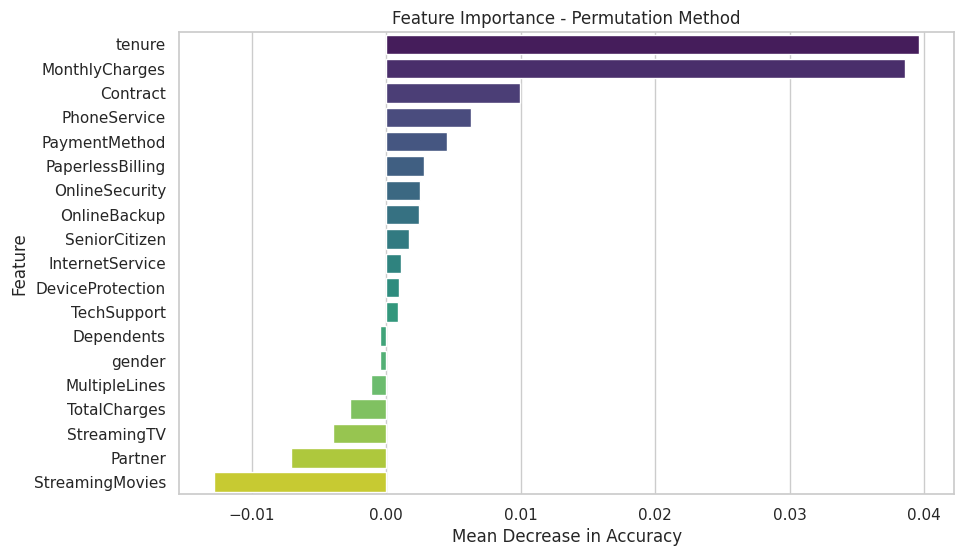

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Custom wrapper for the Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # This wrapper won't re-train the model; it assumes the model is pre-trained.
        pass

    def predict(self, X):
        # Predict class labels (binary: 0 or 1)
        probs = self.keras_model.predict(X)
        return (probs > 0.5).astype(int).flatten()

# Wrap the trained model
wrapped_model = KerasClassifierWrapper(model)

# Calculate permutation importance
perm_importance = permutation_importance(
    wrapped_model,  # Wrapped model
    X_test,
    y_test,
    scoring="accuracy",
    n_repeats=10,
    random_state=42
)

# Convert results to a DataFrame for easier visualization
perm_df = pd.DataFrame({
    "Feature": df.drop('Churn', axis=1).columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Permutation Method")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Feature")
plt.show()
